In [97]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

plt.close('all')

In [98]:
# 6 is category
d = pd.read_csv('asimut.csv', header=0, usecols=[6,7,8,11,12,13], parse_dates=[1,2]);


In [118]:
#d.category.unique()

In [100]:
d['total'] = d.count_teachers + d.count_students + d.count_participants

In [109]:
d = d[d.category != 'Cancelled event']
d = d[d.category != 'online lesson']
# d.groupby('category')['total'].plot(legend=True, figsize=(20,10))

In [110]:
d.loc[(d.category == 'Individual lesson'), 'total'] = 2

In [111]:
today = datetime.date.today()
eight = datetime.datetime(today.year,today.month,today.day,8,0)
a = eight + datetime.timedelta(minutes=30)
# data['start_at'][0]
# print(data['start_at'] <= eight, data['end_at'] > a, eight, data['start_at'][0])
dn = d.copy()
dn.head()
endtime = datetime.datetime(dn.end_at.max().year, dn.end_at.max().month, dn.end_at.max().day, 22, 0)
print('Data begint: ', dn.start_at.min())
print('Data tot: ', endtime)

Data begint:  2020-09-15 08:00:00
Data tot:  2020-09-15 22:00:00


In [112]:
t = pd.date_range(dn.start_at[0], endtime, freq='15min')
n = pd.DataFrame(t, columns=['time'])
n.reset_index(inplace=True)

In [113]:
# dataFrame with time intervals
n['end'] = n['time'] + datetime.timedelta(minutes=15)
totals = []
onlytime = []

for a,b in n['index'].items():
    subtotal = 0
    for i,v in dn['start_at'].items():
        if v <= n['time'][a] and dn['end_at'][i] >= n['end'][a]:
            subtotal += dn['total'][i]
    totals.append(subtotal)
    onlytime.append(n['time'][a].time())

In [114]:
#dn

In [115]:
n['count'] = totals
n['limit'] = 400
n['mins'] = onlytime

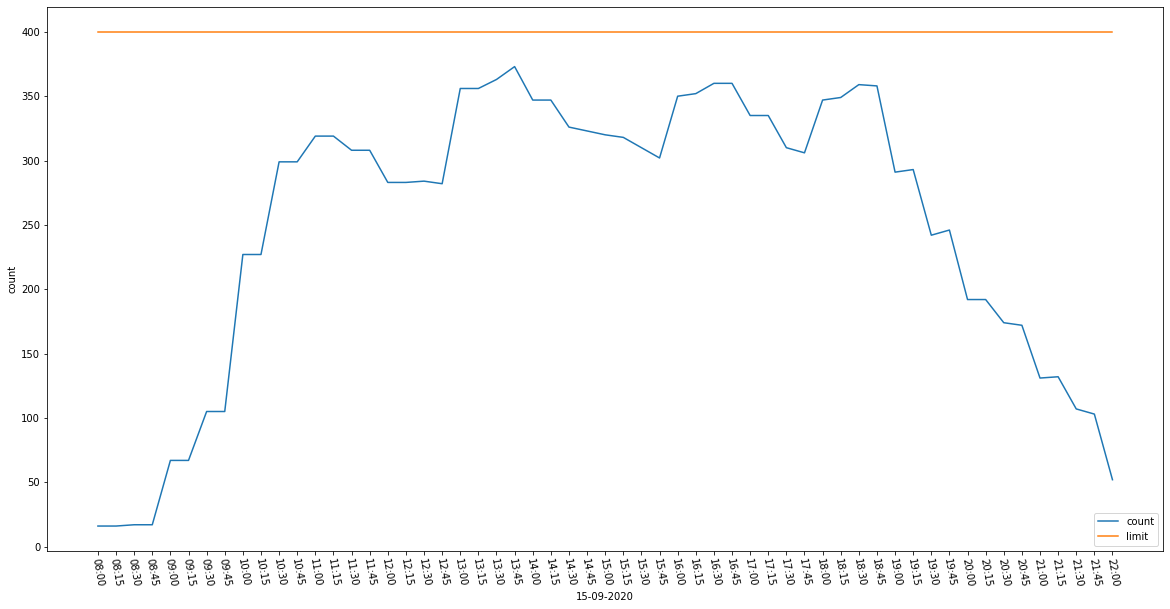

In [116]:
r = n.copy()
r = r.drop(columns=['end', 'index', 'time'])
r.set_index('mins', inplace=True)
labels = [x for x in n['mins']]
ticks = [p for p in r.index]
ax = r.plot(figsize=(20,10), kind='line', rot=-80)
ax.set_xticks(ticks)
ax.set(ylabel='count', xlabel=n['time'][0].strftime('%d-%m-%Y'))
plt.show()
